In [1]:
# load, explore and plot data
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score,r2_score,accuracy_score
import re #for reducing noise of dataset;text reprocessing
import string #for text processing
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#suppress display of warnings
import warnings
warnings.filterwarnings("ignore")


In [2]:
#reading the given dataset

data= pd.read_csv('Churn_Modelling.csv' )

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
data.size

140000

In [6]:
data.isnull().sum

<bound method DataFrame.sum of       RowNumber  CustomerId  Surname  CreditScore  Geography  Gender    Age  \
0         False       False    False        False      False   False  False   
1         False       False    False        False      False   False  False   
2         False       False    False        False      False   False  False   
3         False       False    False        False      False   False  False   
4         False       False    False        False      False   False  False   
...         ...         ...      ...          ...        ...     ...    ...   
9995      False       False    False        False      False   False  False   
9996      False       False    False        False      False   False  False   
9997      False       False    False        False      False   False  False   
9998      False       False    False        False      False   False  False   
9999      False       False    False        False      False   False  False   

      Tenure  Balanc

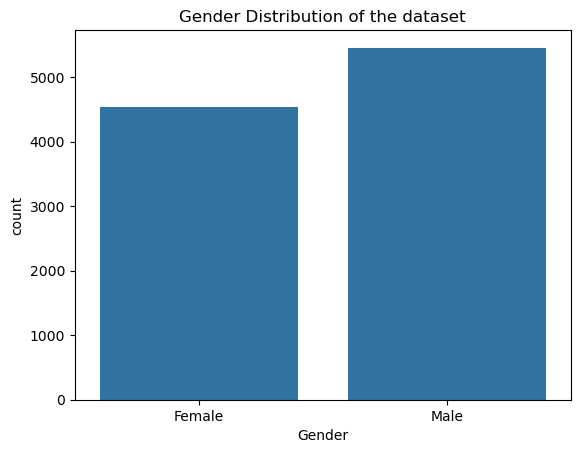

In [7]:
#plotting a graph showing the various genders
sns.countplot(x='Gender',data=data)
plt.title('Gender Distribution of the dataset')
plt.show()

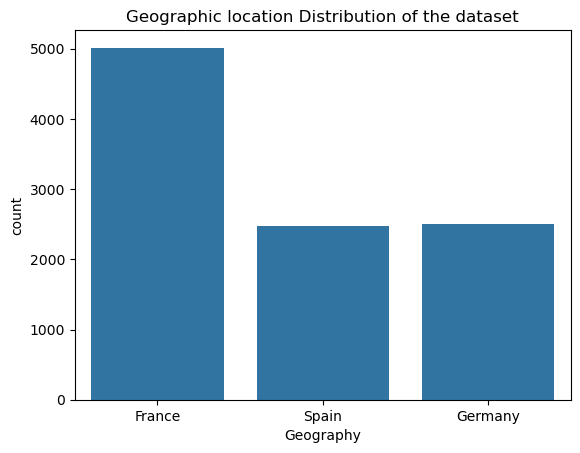

In [8]:
#plotting a graph showing the various geographic locations
sns.countplot(x='Geography',data=data)
plt.title('Geographic location Distribution of the dataset')
plt.show()

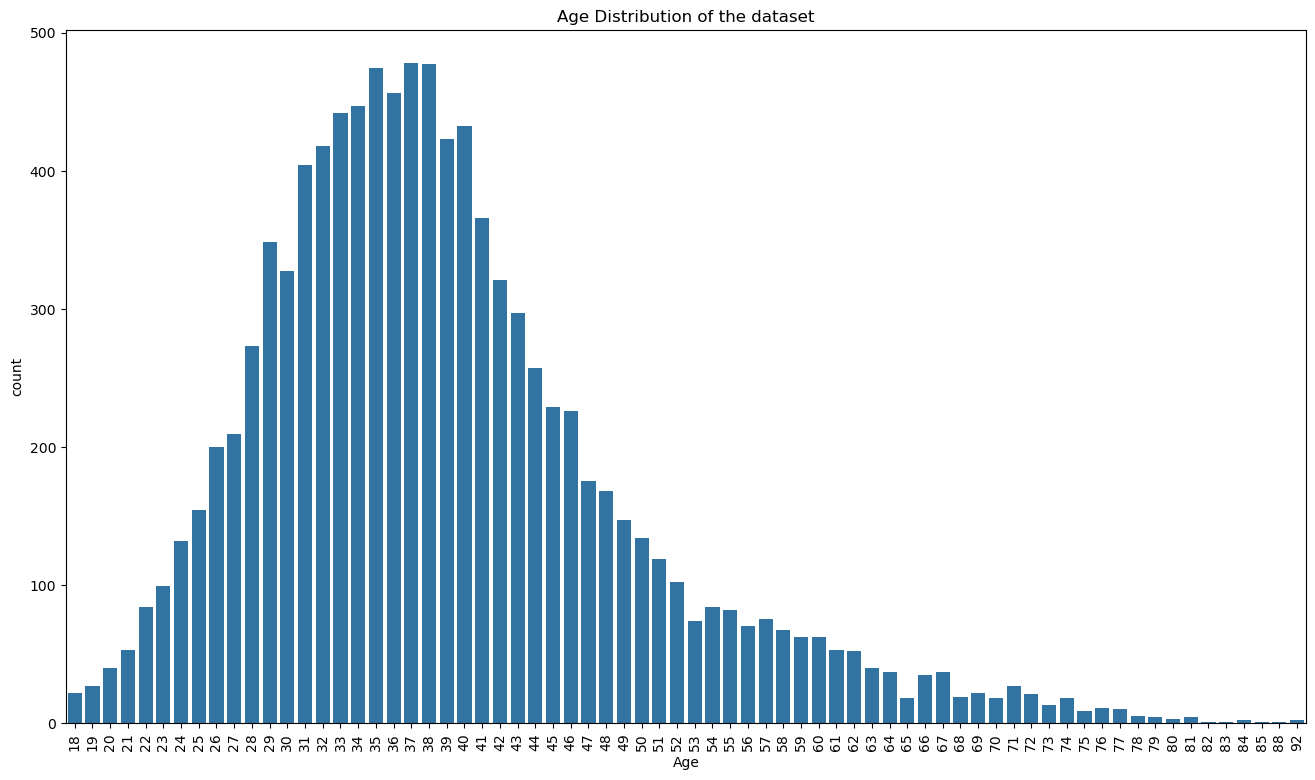

In [9]:
#plotting a graph showing the various ages
plt.figure(figsize=(16,9))
sns.countplot(x='Age',data=data)
plt.title('Age Distribution of the dataset')
plt.xticks(rotation=90);
plt.show()

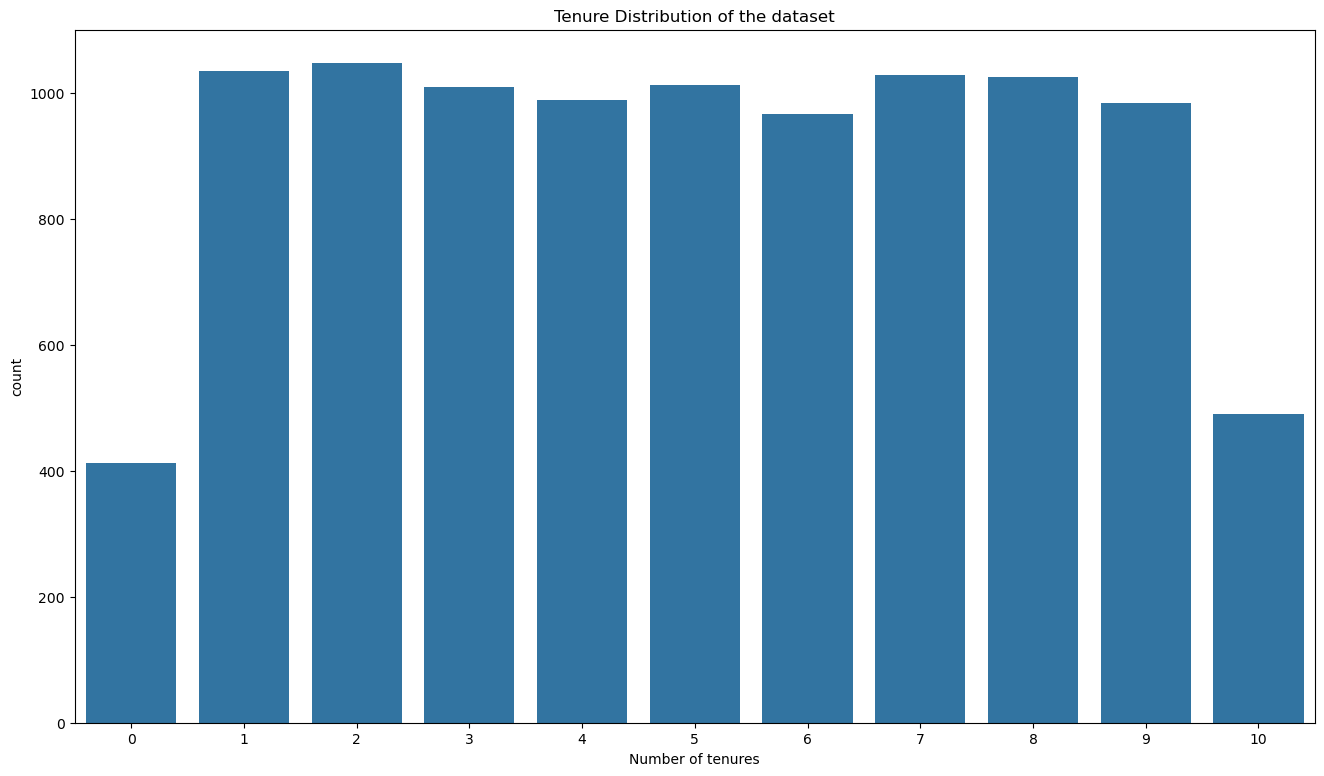

In [10]:
#plotting a graph showing the various tenures
plt.figure(figsize=(16,9))
sns.countplot(x='Tenure',data=data)
plt.title('Tenure Distribution of the dataset')
plt.xlabel('Number of tenures')

plt.show()

In [11]:
x=data.drop("Exited", axis =1)
x1=x.drop("Surname", axis =1)
x2=x1.drop("Geography", axis =1)
x3=x2.drop("Gender", axis =1)
y= data["Exited"]

In [12]:
x_train,x_test,y_train,y_test= train_test_split(x3,y,test_size=0.1,random_state=32)

In [13]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [14]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [15]:
lr_model=LogisticRegression()
lr_model.fit(x_train,y_train)

LogisticRegression()

In [16]:
prediction =  lr_model.predict(x_test)

In [17]:
from sklearn.metrics import classification_report, f1_score,r2_score,accuracy_score,confusion_matrix

Text(120.72222222222221, 0.5, 'Truth')

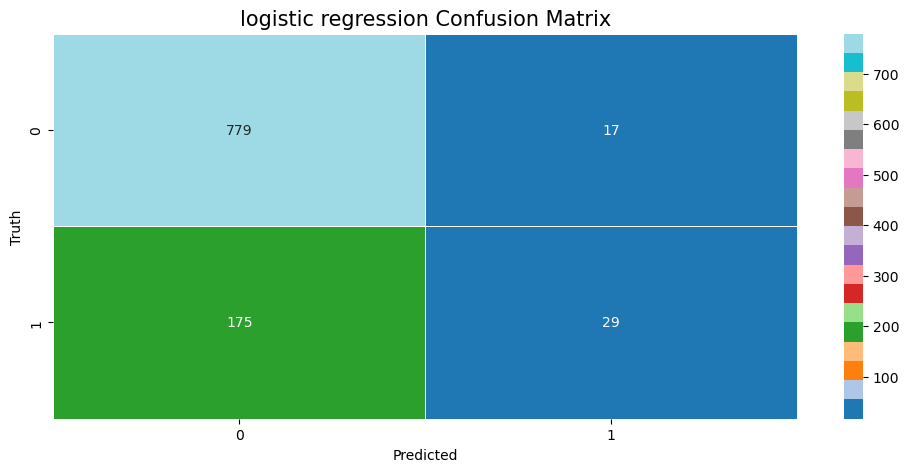

In [18]:
import seaborn as sn
cm = confusion_matrix(y_test, prediction)

plt.figure(figsize = (12,5))
sn.heatmap(cm, annot=True,linewidth = 0.5 , cmap = 'tab20' , fmt='d')
plt.title('logistic regression Confusion Matrix', size=15)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [19]:
print("Logistic regression model")

print(classification_report(y_test,prediction))
print("Accuracy:" , accuracy_score(y_test, prediction))
print("r2_score:" , r2_score(y_test, prediction))
print("f1_score:" , f1_score(y_test, prediction))

Logistic regression model
              precision    recall  f1-score   support

           0       0.82      0.98      0.89       796
           1       0.63      0.14      0.23       204

    accuracy                           0.81      1000
   macro avg       0.72      0.56      0.56      1000
weighted avg       0.78      0.81      0.76      1000

Accuracy: 0.808
r2_score: -0.18238250073898898
f1_score: 0.232


In [20]:
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
fr_model = RandomForestClassifier(n_estimators=1000, n_jobs= -1,random_state=32)

In [21]:
fr_model.fit(x_train,y_train)


RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=32)

In [22]:
fr_prediction = fr_model.predict(x_test)

Text(120.72222222222221, 0.5, 'Truth')

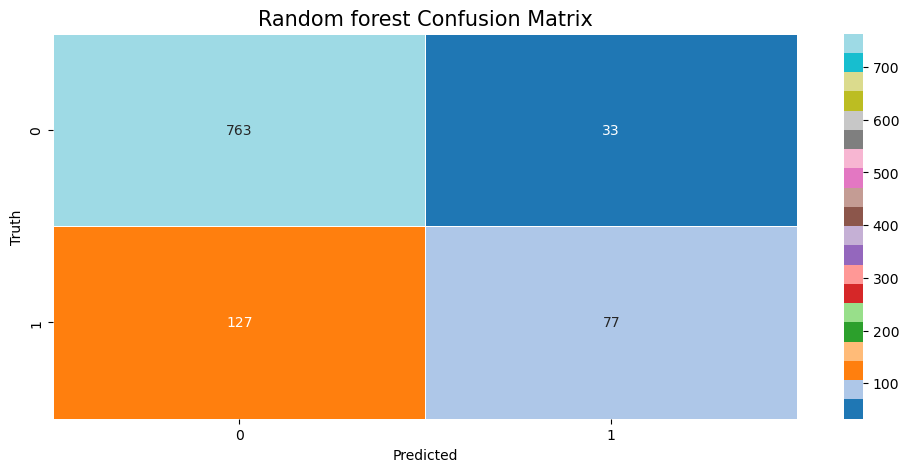

In [23]:
fr_cm = confusion_matrix(y_test, fr_prediction)

plt.figure(figsize = (12,5))
sn.heatmap(fr_cm, annot=True,linewidth = 0.5 , cmap = 'tab20' , fmt='d')
plt.title('Random forest Confusion Matrix', size=15)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [24]:
print("Random Forest model")

print(classification_report(y_test,fr_prediction))
print("Accuracy:" , accuracy_score(y_test, fr_prediction))
print("r2_score:" , r2_score(y_test, fr_prediction))
print("f1_score:" , f1_score(y_test, fr_prediction))

Random Forest model
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       796
           1       0.70      0.38      0.49       204

    accuracy                           0.84      1000
   macro avg       0.78      0.67      0.70      1000
weighted avg       0.83      0.84      0.82      1000

Accuracy: 0.84
r2_score: 0.01468124938417592
f1_score: 0.49044585987261147


In [25]:
gbc_model = GradientBoostingClassifier(n_estimators=1000,learning_rate=0.04,max_depth=1,random_state=32)

In [26]:
gbc_model.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.04, max_depth=1, n_estimators=1000,
                           random_state=32)

In [27]:
gbc_prediction = gbc_model.predict(x_test)

Text(120.72222222222221, 0.5, 'Truth')

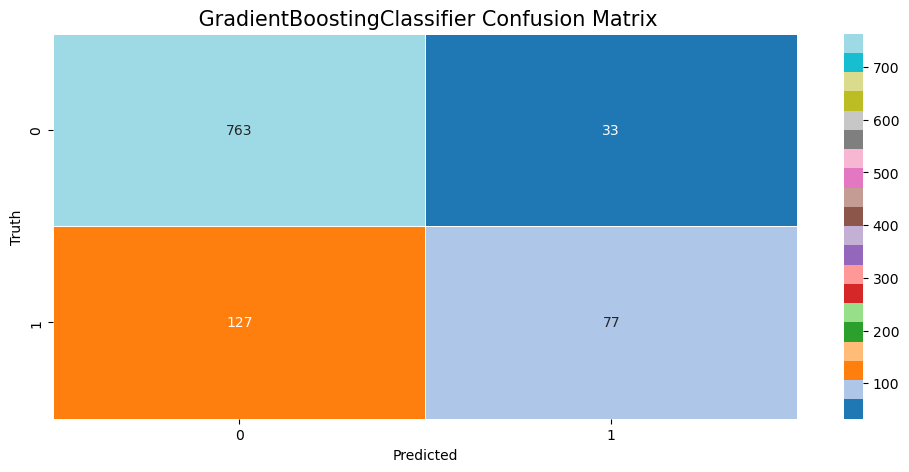

In [28]:
gbc_cm = confusion_matrix(y_test, gbc_prediction)

plt.figure(figsize = (12,5))
sn.heatmap(fr_cm, annot=True,linewidth = 0.5 , cmap = 'tab20' , fmt='d')
plt.title(' GradientBoostingClassifier Confusion Matrix', size=15)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [29]:
print("GradientBoostingClassifier")

print(classification_report(y_test,gbc_prediction))
print("Accuracy:" , accuracy_score(y_test, gbc_prediction))
print("r2_score:" , r2_score(y_test, gbc_prediction))
print("f1_score:" , f1_score(y_test, gbc_prediction))

GradientBoostingClassifier
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       796
           1       0.73      0.41      0.52       204

    accuracy                           0.85      1000
   macro avg       0.80      0.68      0.72      1000
weighted avg       0.84      0.85      0.83      1000

Accuracy: 0.848
r2_score: 0.06394718691496704
f1_score: 0.5220125786163522


In [30]:
import pickle

pickle.dump(lr_model,open('model1.pkl','wb'))
pickle.dump(fr_model,open('model2.pkl','wb'))
pickle.dump(gbc_model,open('model3.pkl','wb'))

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(max_features=3000)

import pickle
pickle.dump(tf,open('vectorizer.pkl','wb'))

In [32]:
vectorizer = pickle.load(open('vectorizer.pkl', 'rb'))
model1 = pickle.load(open('model1.pkl', 'rb'))
model2 = pickle.load(open('model2.pkl', 'rb'))
model3 = pickle.load(open('model3.pkl', 'rb'))

In [33]:
results_df = pd.DataFrame({
    'Original': y_test, 
    'Logistic Regression': prediction,
    'Random Forest':fr_prediction,
    'Gradient Boosting':gbc_prediction
})

In [34]:
# Saving the DataFrame to a CSV file
results_df.to_csv('predicted_results.csv', index=False)